# Decision Tree

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.optimize as opt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
drug_data = pd.read_csv(r"E:\nti\ml\CLASSIFICATION\Telco-Customer-Churn.csv")
drug_data

PermissionError: [Errno 13] Permission denied: 'E:\\nti\\ml\\CLASSIFICATION\\Telco-Customer-Churn.csv'

In [ ]:
drug_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
drug_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
drug_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
drug_data_selected = drug_data[[]]

SyntaxError: invalid syntax (549604536.py, line 3)

In [ ]:
drug_data = pd.read_csv(r"C:\Users\ALMASRIA 4 COMP\Desktop\ML\drug200.csv")
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
drug_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
drug_data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
drug_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
drug_data['Sex'] = label_encoder.fit_transform(drug_data['Sex'])
print(drug_data.head())


   Age  Sex      BP Cholesterol  Na_to_K   Drug
0   23    0    HIGH        HIGH   25.355  DrugY
1   47    1     LOW        HIGH   13.093  drugC
2   47    1     LOW        HIGH   10.114  drugC
3   28    0  NORMAL        HIGH    7.798  drugX
4   61    0     LOW        HIGH   18.043  DrugY


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
drug_data['BP'] = label_encoder.fit_transform(drug_data['BP'])
print(drug_data.head())

   Age  Sex  BP Cholesterol  Na_to_K   Drug
0   23    0   0        HIGH   25.355  DrugY
1   47    1   1        HIGH   13.093  drugC
2   47    1   1        HIGH   10.114  drugC
3   28    0   2        HIGH    7.798  drugX
4   61    0   1        HIGH   18.043  DrugY


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
drug_data['Cholesterol'] = label_encoder.fit_transform(drug_data['Cholesterol'])
print(drug_data.head())

   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  DrugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  DrugY


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
drug_data['Drug'] = label_encoder.fit_transform(drug_data['Drug'])
print(drug_data.head())

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     0
1   47    1   1            0   13.093     3
2   47    1   1            0   10.114     3
3   28    0   2            0    7.798     4
4   61    0   1            0   18.043     0


## Train Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

In [ ]:
X = drug_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].to_numpy()
y = drug_data['Drug'].to_numpy()

In [ ]:
X_test.shape


(66, 5)

In [ ]:
y_train.shape

(134,)

In [ ]:
drug_data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
5,22,0,2,0,8.607,4
6,49,0,2,0,16.275,0
7,41,1,1,0,11.037,3
8,60,1,2,0,15.171,0
9,43,1,1,1,19.368,0


In [ ]:
drug_data.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

## Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=5).fit(X_train,y_train) 
tree_model.fit(X_train, y_train)
y = tree_model.predict(X_test)
print(y)


[4 0 0 0 4 4 0 0 1 4 1 0 1 0 0 4 0 0 0 1 0 4 0 0 1 1 1 4 0 0 0 4 4 4 1 1 0
 0 1 4 4 0 0 0 4 0 4 1 1 0 4 0 4 1 0 0 4 0 0 0 0 4 4 4 1 0]


In [1]:
from sklearn.linear_model import LogisticRegression 
solver_list = {'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga', 'liblinear'}
for solver in solver_list:
    tree_model= LogisticRegression(solver=solver)
    tree_model.fit(X_train,y_train)
    predictions = tree_model.predict(X_test)
    predictions_probabilty = tree_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    csr= classification_report(y_test,predictions)
    print(f"{solver}:")
    print(csr)

NameError: name 'X_train' is not defined

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


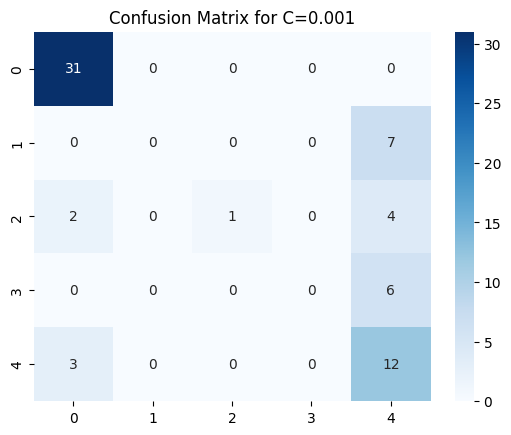

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

liblinear:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        31
           1       0.00      0.00      0.00         7
           2       1.00      0.14      0.25         7
           3       0.00      0.00      0.00         6
           4       0.41      0.80      0.55        15

    accuracy                           0.67        66
   macro avg       0.45      0.39      0.34        66
weighted avg       0.60      0.67      0.59        66



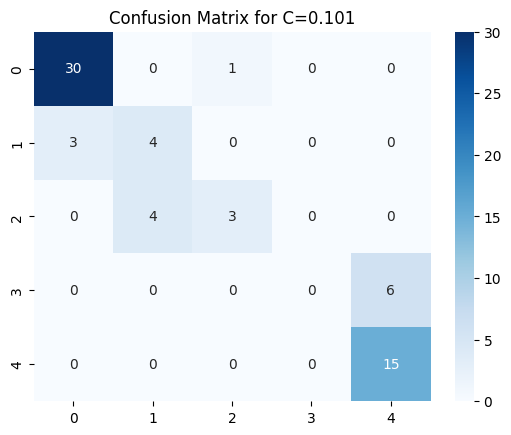

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

liblinear:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.50      0.57      0.53         7
           2       0.75      0.43      0.55         7
           3       0.00      0.00      0.00         6
           4       0.71      1.00      0.83        15

    accuracy                           0.79        66
   macro avg       0.57      0.59      0.57        66
weighted avg       0.72      0.79      0.74        66



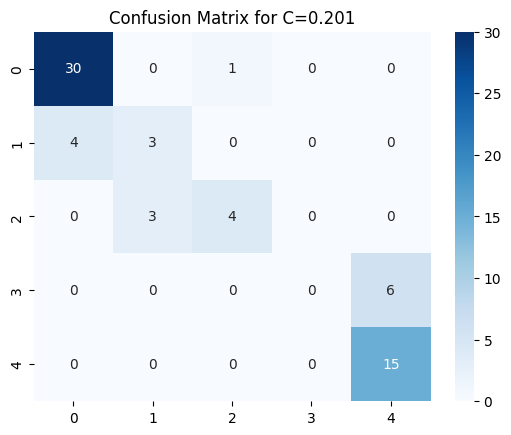

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

liblinear:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.50      0.43      0.46         7
           2       0.80      0.57      0.67         7
           3       0.00      0.00      0.00         6
           4       0.71      1.00      0.83        15

    accuracy                           0.79        66
   macro avg       0.58      0.59      0.58        66
weighted avg       0.71      0.79      0.74        66



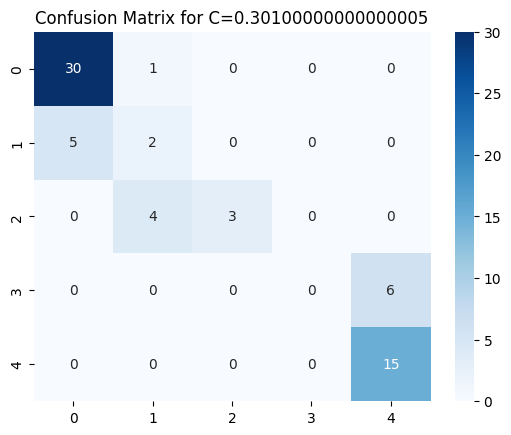

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

liblinear:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.29      0.29      0.29         7
           2       1.00      0.43      0.60         7
           3       0.00      0.00      0.00         6
           4       0.71      1.00      0.83        15

    accuracy                           0.76        66
   macro avg       0.57      0.54      0.53        66
weighted avg       0.70      0.76      0.71        66



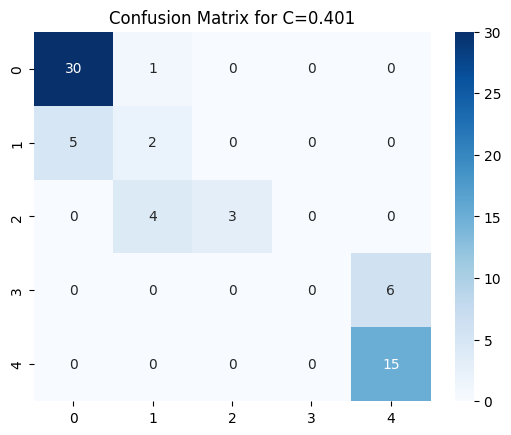

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

liblinear:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.29      0.29      0.29         7
           2       1.00      0.43      0.60         7
           3       0.00      0.00      0.00         6
           4       0.71      1.00      0.83        15

    accuracy                           0.76        66
   macro avg       0.57      0.54      0.53        66
weighted avg       0.70      0.76      0.71        66



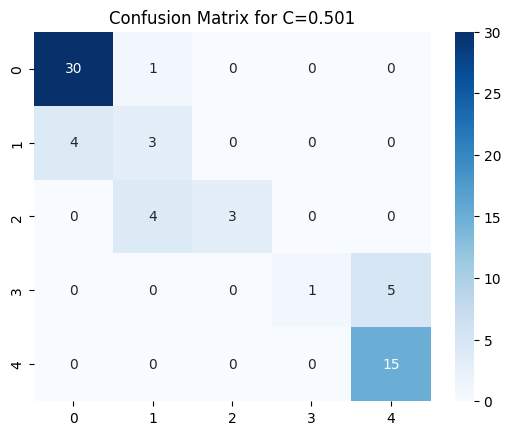

liblinear:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.38      0.43      0.40         7
           2       1.00      0.43      0.60         7
           3       1.00      0.17      0.29         6
           4       0.75      1.00      0.86        15

    accuracy                           0.79        66
   macro avg       0.80      0.60      0.61        66
weighted avg       0.82      0.79      0.76        66



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


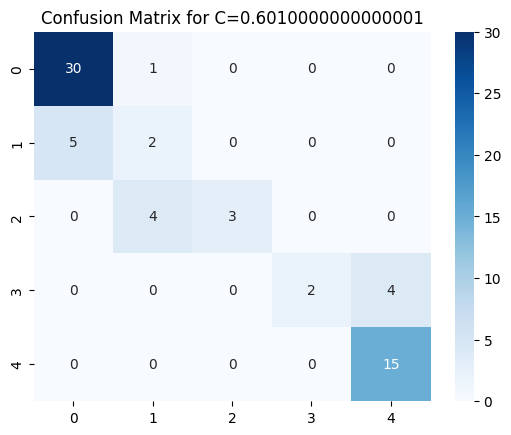

liblinear:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.29      0.29      0.29         7
           2       1.00      0.43      0.60         7
           3       1.00      0.33      0.50         6
           4       0.79      1.00      0.88        15

    accuracy                           0.79        66
   macro avg       0.79      0.60      0.64        66
weighted avg       0.81      0.79      0.77        66



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


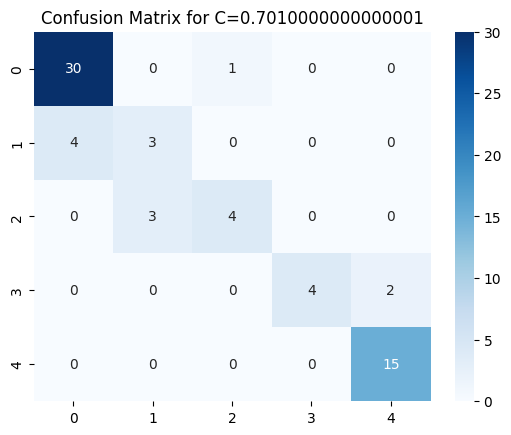

liblinear:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.50      0.43      0.46         7
           2       0.80      0.57      0.67         7
           3       1.00      0.67      0.80         6
           4       0.88      1.00      0.94        15

    accuracy                           0.85        66
   macro avg       0.81      0.73      0.76        66
weighted avg       0.84      0.85      0.84        66



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


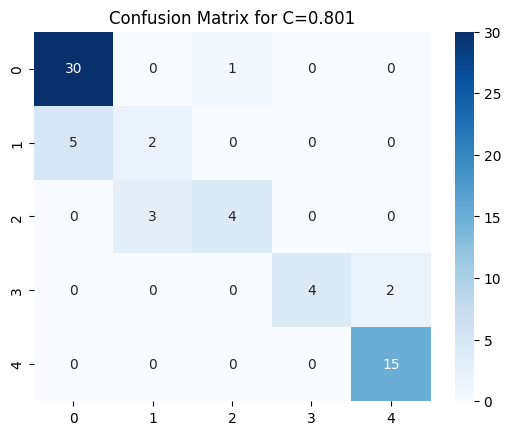

liblinear:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.40      0.29      0.33         7
           2       0.80      0.57      0.67         7
           3       1.00      0.67      0.80         6
           4       0.88      1.00      0.94        15

    accuracy                           0.83        66
   macro avg       0.79      0.70      0.73        66
weighted avg       0.82      0.83      0.82        66



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


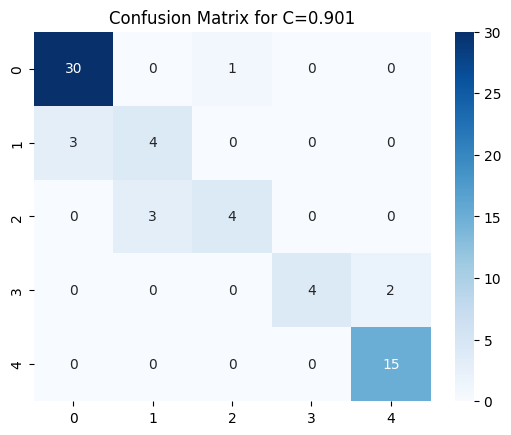

liblinear:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.57      0.57      0.57         7
           2       0.80      0.57      0.67         7
           3       1.00      0.67      0.80         6
           4       0.88      1.00      0.94        15

    accuracy                           0.86        66
   macro avg       0.83      0.76      0.78        66
weighted avg       0.86      0.86      0.86        66



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


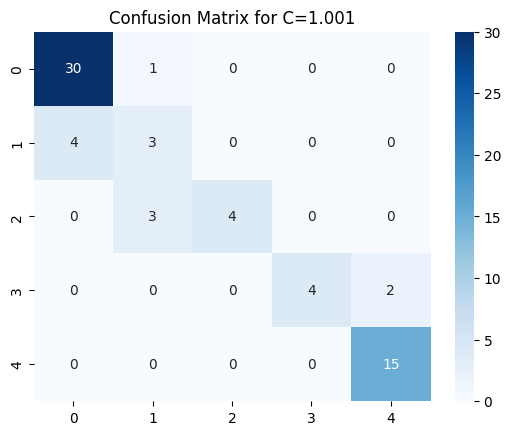

liblinear:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.43      0.43      0.43         7
           2       1.00      0.57      0.73         7
           3       1.00      0.67      0.80         6
           4       0.88      1.00      0.94        15

    accuracy                           0.85        66
   macro avg       0.84      0.73      0.76        66
weighted avg       0.86      0.85      0.84        66



In [62]:
for O in np.arange(0.001, 1.1, 0.1):
    log_model = LogisticRegression(C=O)
    log_model.fit(X_train, y_train)
    predictions = log_model.predict(X_test)
    predictions_probability = log_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f", cmap="Blues")
    plt.title(f'Confusion Matrix for C={O}')
    plt.show()
    csr = classification_report(y_test, predictions)
    print(f"{solver}:")
    print(csr)

In [67]:
predictions = log_model.predict(X_test)
print(predictions[50:100])
print(y_test[50:100])
print(predictions)
print(y_test)

[4 0 4 0 0 0 4 0 0 0 0 4 4 4 1 0]
[4 0 4 1 0 0 3 0 0 0 0 4 4 3 1 0]
[4 0 0 0 3 3 0 0 1 4 2 0 1 0 0 3 0 0 4 0 0 4 1 0 2 0 0 4 0 0 0 4 4 3 2 1 0
 0 1 4 4 0 0 0 4 0 4 1 2 0 4 0 4 0 0 0 4 0 0 0 0 4 4 4 1 0]
[4 0 0 0 3 3 0 0 1 4 2 0 2 0 0 3 0 0 4 1 0 4 0 0 2 1 1 4 0 0 0 4 4 3 2 2 0
 0 2 4 4 0 0 0 4 0 4 1 2 0 4 0 4 1 0 0 3 0 0 0 0 4 4 3 1 0]


In [68]:
predictions_probabilty =   log_model.predict_proba(X_test)
predictions_probabilty

array([[3.74954979e-01, 7.65048814e-04, 1.69285813e-03, 2.00493305e-01,
        4.22093809e-01],
       [9.99598012e-01, 7.09527102e-06, 1.11452996e-08, 3.07186763e-04,
        8.76947672e-05],
       [9.99697499e-01, 1.96120143e-04, 3.66646532e-07, 8.74542168e-05,
        1.85604177e-05],
       [8.91656472e-01, 9.67909307e-02, 3.11811363e-03, 6.42517913e-03,
        2.00930441e-03],
       [2.70562041e-01, 2.80039912e-02, 1.19327090e-01, 4.58506771e-01,
        1.23600107e-01],
       [1.60446340e-01, 6.23893024e-02, 2.98847801e-02, 4.48642685e-01,
        2.98636893e-01],
       [7.24621647e-01, 2.60485529e-01, 4.02473769e-04, 6.52425712e-03,
        7.96609321e-03],
       [6.32555332e-01, 4.05012880e-02, 1.40312126e-02, 2.69181193e-01,
        4.37309741e-02],
       [4.18944579e-01, 4.53779080e-01, 1.33585458e-02, 1.07187553e-01,
        6.73024237e-03],
       [7.64775470e-03, 2.14621170e-02, 7.92955223e-03, 2.72887282e-02,
        9.35671848e-01],
       [3.43706716e-03, 2.5397

## Metrics Evalution 

<Axes: >

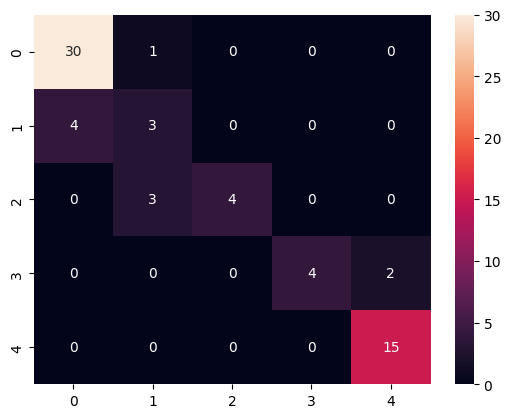

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True, fmt=".0f")

## Visualisation

In [70]:
from sklearn.metrics import classification_report
csr= classification_report(y_test,predictions)
print(csr)


              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.43      0.43      0.43         7
           2       1.00      0.57      0.73         7
           3       1.00      0.67      0.80         6
           4       0.88      1.00      0.94        15

    accuracy                           0.85        66
   macro avg       0.84      0.73      0.76        66
weighted avg       0.86      0.85      0.84        66



In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

tree_model = RandomForestClassifier(criterion='entropy',max_depth=5,   ).fit(X_train,y_train) 

tree_model.fit(X_train, y_train)
y = tree_model.predict(X_test)
print(y)



[4 0 0 0 3 3 0 0 1 4 2 0 1 0 0 3 0 0 0 1 0 4 0 0 2 1 1 4 0 0 0 4 4 3 1 2 0
 0 2 4 4 0 0 0 4 0 4 1 2 0 4 0 4 1 0 0 3 0 0 0 0 4 4 3 1 0]


c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lbfgs:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.60      0.86      0.71         7
           2       1.00      0.57      0.73         7
           3       1.00      0.67      0.80         6
           4       0.88      0.93      0.90        15

    accuracy                           0.88        66
   macro avg       0.88      0.80      0.82        66
weighted avg       0.90      0.88      0.88        66

newton-cg:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.70      1.00      0.82         7
           2       0.86      0.86      0.86         7
           3       1.00      0.67      0.80         6
           4       1.00      0.93      0.97        15

    accuracy                           0.94        66
   macro avg       0.91      0.89      0.89        66
weighted avg       0.95      0.94      0.94        66

newt

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python3

saga:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        31
           1       0.00      0.00      0.00         7
           2       1.00      0.43      0.60         7
           3       0.00      0.00      0.00         6
           4       0.64      0.93      0.76        15

    accuracy                           0.68        66
   macro avg       0.47      0.45      0.43        66
weighted avg       0.59      0.68      0.61        66

liblinear:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        31
           1       0.67      0.29      0.40         7
           2       0.80      0.57      0.67         7
           3       1.00      0.17      0.29         6
           4       0.75      1.00      0.86        15

    accuracy                           0.79        66
   macro avg       0.81      0.60      0.62        66
weighted avg       0.80      0.79      0.75        66



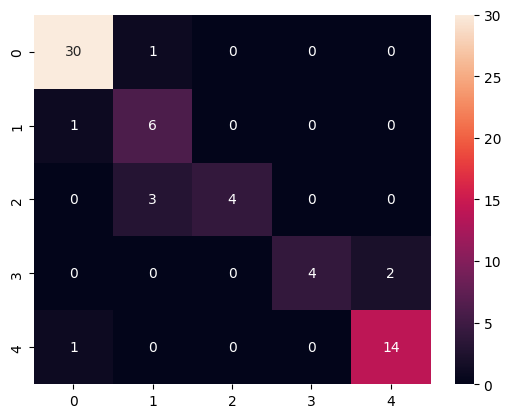

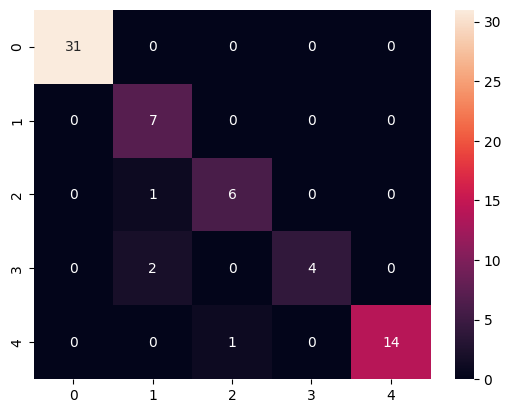

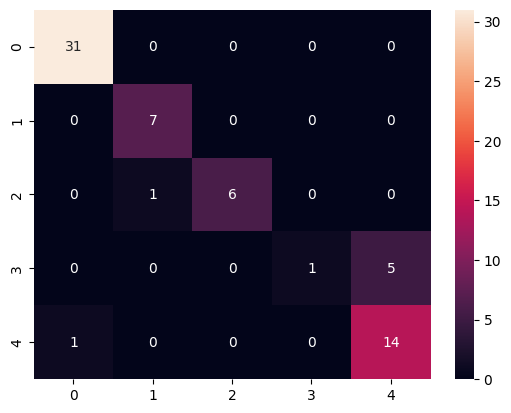

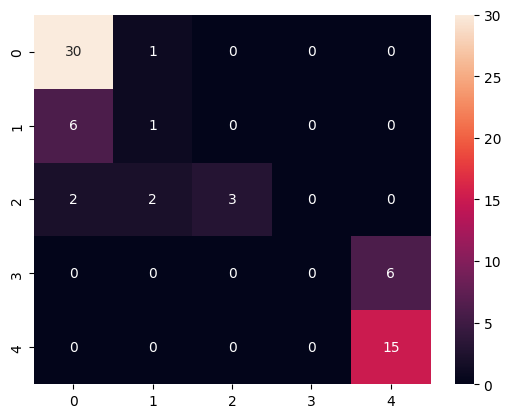

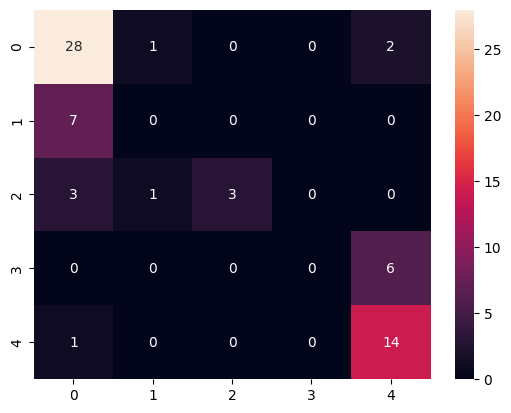

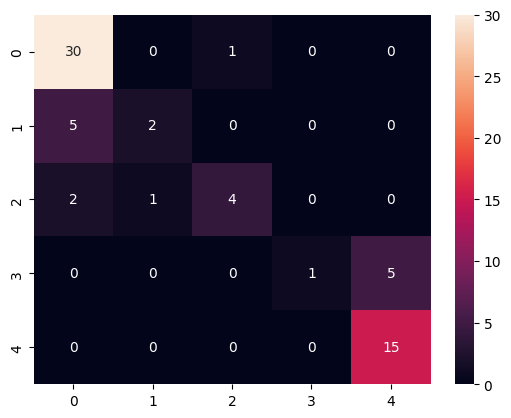

In [84]:
from sklearn.linear_model import LogisticRegression 
solver_list = {'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga', 'liblinear'}
for solver in solver_list:
    tree_model= LogisticRegression(solver=solver)
    tree_model.fit(X_train,y_train)
    predictions = tree_model.predict(X_test)
    predictions_probabilty = tree_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    csr= classification_report(y_test,predictions)
    print(f"{solver}:")
    print(csr)

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


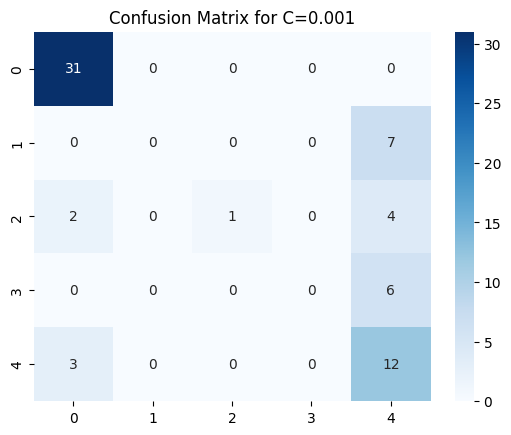

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

liblinear:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        31
           1       0.00      0.00      0.00         7
           2       1.00      0.14      0.25         7
           3       0.00      0.00      0.00         6
           4       0.41      0.80      0.55        15

    accuracy                           0.67        66
   macro avg       0.45      0.39      0.34        66
weighted avg       0.60      0.67      0.59        66



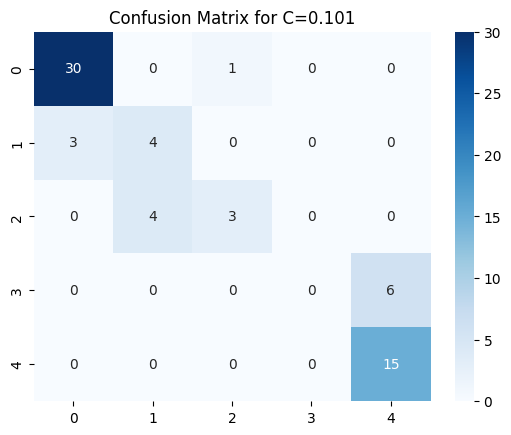

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

liblinear:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.50      0.57      0.53         7
           2       0.75      0.43      0.55         7
           3       0.00      0.00      0.00         6
           4       0.71      1.00      0.83        15

    accuracy                           0.79        66
   macro avg       0.57      0.59      0.57        66
weighted avg       0.72      0.79      0.74        66



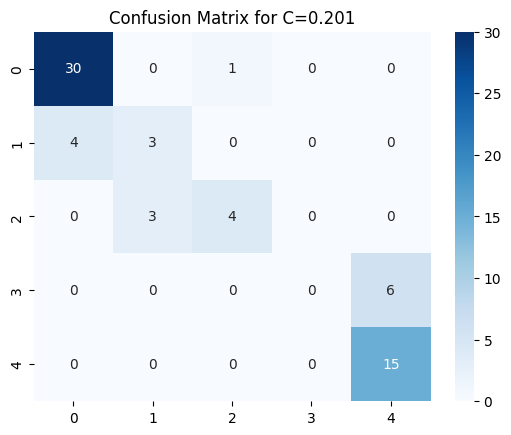

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

liblinear:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.50      0.43      0.46         7
           2       0.80      0.57      0.67         7
           3       0.00      0.00      0.00         6
           4       0.71      1.00      0.83        15

    accuracy                           0.79        66
   macro avg       0.58      0.59      0.58        66
weighted avg       0.71      0.79      0.74        66



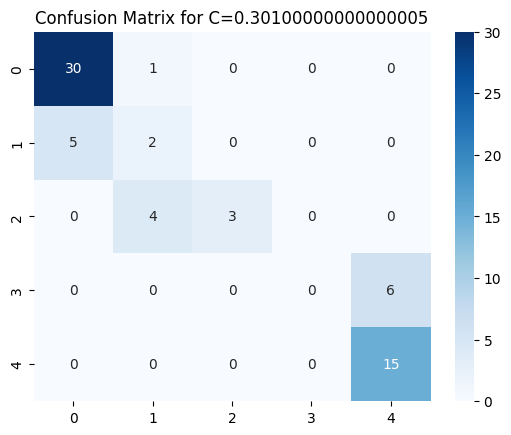

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

liblinear:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.29      0.29      0.29         7
           2       1.00      0.43      0.60         7
           3       0.00      0.00      0.00         6
           4       0.71      1.00      0.83        15

    accuracy                           0.76        66
   macro avg       0.57      0.54      0.53        66
weighted avg       0.70      0.76      0.71        66



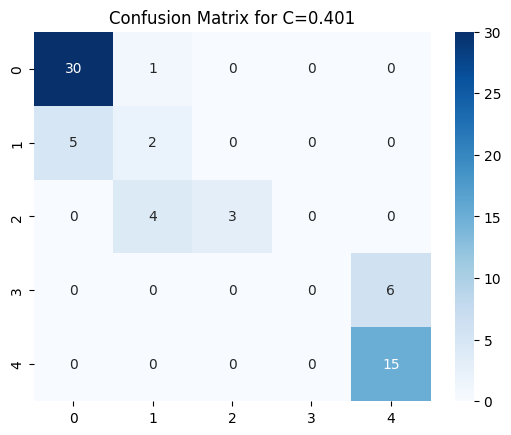

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

liblinear:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.29      0.29      0.29         7
           2       1.00      0.43      0.60         7
           3       0.00      0.00      0.00         6
           4       0.71      1.00      0.83        15

    accuracy                           0.76        66
   macro avg       0.57      0.54      0.53        66
weighted avg       0.70      0.76      0.71        66



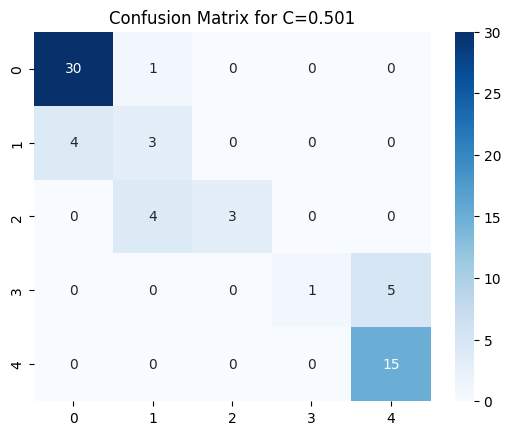

liblinear:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.38      0.43      0.40         7
           2       1.00      0.43      0.60         7
           3       1.00      0.17      0.29         6
           4       0.75      1.00      0.86        15

    accuracy                           0.79        66
   macro avg       0.80      0.60      0.61        66
weighted avg       0.82      0.79      0.76        66



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


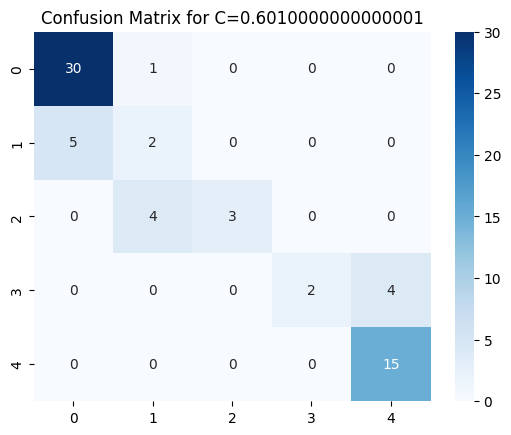

liblinear:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.29      0.29      0.29         7
           2       1.00      0.43      0.60         7
           3       1.00      0.33      0.50         6
           4       0.79      1.00      0.88        15

    accuracy                           0.79        66
   macro avg       0.79      0.60      0.64        66
weighted avg       0.81      0.79      0.77        66



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


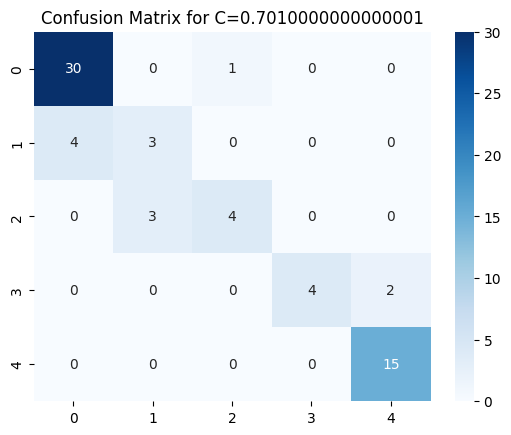

liblinear:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.50      0.43      0.46         7
           2       0.80      0.57      0.67         7
           3       1.00      0.67      0.80         6
           4       0.88      1.00      0.94        15

    accuracy                           0.85        66
   macro avg       0.81      0.73      0.76        66
weighted avg       0.84      0.85      0.84        66



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


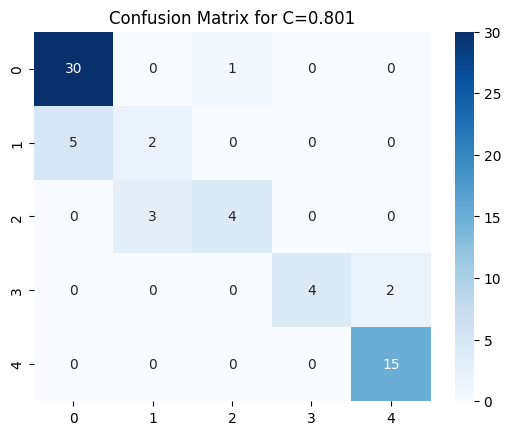

liblinear:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.40      0.29      0.33         7
           2       0.80      0.57      0.67         7
           3       1.00      0.67      0.80         6
           4       0.88      1.00      0.94        15

    accuracy                           0.83        66
   macro avg       0.79      0.70      0.73        66
weighted avg       0.82      0.83      0.82        66



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


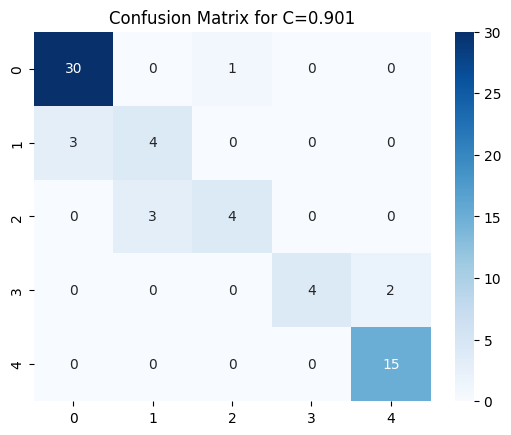

liblinear:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.57      0.57      0.57         7
           2       0.80      0.57      0.67         7
           3       1.00      0.67      0.80         6
           4       0.88      1.00      0.94        15

    accuracy                           0.86        66
   macro avg       0.83      0.76      0.78        66
weighted avg       0.86      0.86      0.86        66



c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


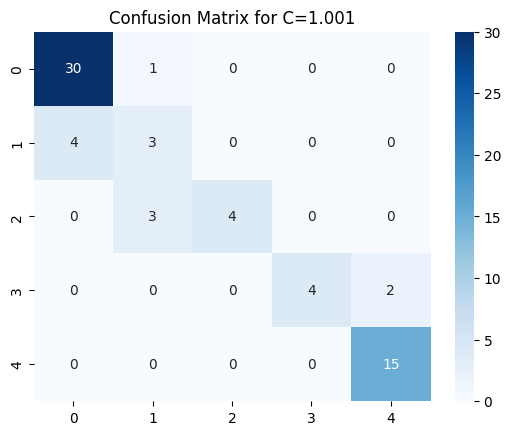

liblinear:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.43      0.43      0.43         7
           2       1.00      0.57      0.73         7
           3       1.00      0.67      0.80         6
           4       0.88      1.00      0.94        15

    accuracy                           0.85        66
   macro avg       0.84      0.73      0.76        66
weighted avg       0.86      0.85      0.84        66



In [85]:
for O in np.arange(0.001, 1.1, 0.1):
    log_model = LogisticRegression(C=O)
    log_model.fit(X_train, y_train)
    predictions = log_model.predict(X_test)
    predictions_probability = log_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f", cmap="Blues")
    plt.title(f'Confusion Matrix for C={O}')
    plt.show()
    csr = classification_report(y_test, predictions)
    print(f"{solver}:")
    print(csr)

## Try with yourself
try  different optimizer and regulariztion 